# PRÀCTICA 2
## PRÀCTICA 2.a
- split adecuat val test
- hyperparameters optimization
- features study (del count vectorizer)
- error analisys

In [17]:
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews as mr
nltk.download('stopwords')
import numpy as np


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\34644\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\34644\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Preprocessament de dades
stop_words = set(stopwords.words('english'))
documents = [(list(mr.words(fileid)), category)
             for category in mr.categories()
             for fileid in mr.fileids(category)]



In [11]:
categories = list(label for _, label in documents)
print("Categorías en orden:", categories)

Categorías en orden: ['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg'

In [12]:
# Convertir les dades en text
texts = [' '.join([word.lower() for word in words if word.isalpha() and word not in stop_words])
         for words, _ in documents]
labels = [label for _ , label in documents]

# Identificadors de text
text_ids = list(range(len(documents)))


# Dividir les dades en conjunts d'entrenament i test
X_train, X_test, y_train, y_test, train_ids, test_ids = train_test_split(texts, labels, text_ids, test_size=0.3, random_state=123, stratify=labels)



In [13]:


# Definir las combinaciones de hiperparámetros para el vectorizador y los modelos
vectorizer_params = {
    "vectorizer__min_df": [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    "vectorizer__max_df": [0.6, 0.7, 0.8, 0.9]
}

param_grids = {
    "MultinomialNB": {
        **vectorizer_params,
        "classifier__alpha": [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
    },
    "SVM": {
        **vectorizer_params,
        "classifier__C": [0.1, 1, 10, 100],
        "classifier__kernel": ["linear", "rbf", "poly", "sigmoid"],
        "classifier__gamma": ["scale", "auto"]
    },
    "LogisticRegression": {
        **vectorizer_params,
        "classifier__C": [0.1, 1, 10, 100],
        "classifier__solver": ["liblinear", "lbfgs", "saga"],
        "classifier__penalty": ["l2", "l1", "elasticnet"]
    }
}

# Diccionario de modelos
models = {
    "MultinomialNB": MultinomialNB(),
    "SVM": SVC(),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

# Evaluación de cada modelo
best_models = {}
results = {}

for name, model in models.items():
    # Pipeline para cada modelo
    pipeline = Pipeline([
        ("vectorizer", CountVectorizer()),
        ("classifier", model)
    ])

    # GridSearchCV para encontrar los mejores hiperparámetros
    grid_search = GridSearchCV(
        pipeline,
        param_grids[name],
        cv=5,
        scoring="f1_weighted",
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    # Mejor modelo encontrado
    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Evaluar en el conjunto de prueba
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "best_params": grid_search.best_params_,
        "accuracy": accuracy,
        "f1_score": f1,
        "confusion_matrix": conf_matrix
    }

    print(f"Mejores parámetros para {name}: {grid_search.best_params_}")
    print(f"F1-score (weighted) en test: {f1:.4f}")
    print("=" * 50)

# Mostrar resultados finales
for model, res in results.items():
    print(f"\n {model}")
    print(f" - Accuracy: {res['accuracy']:.4f}")
    print(f" - F1-score: {res['f1_score']:.4f}")
    print(f" - Mejor configuración: {res['best_params']}")


Mejores parámetros para MultinomialNB: {'classifier__alpha': 2.0, 'vectorizer__max_df': 0.6, 'vectorizer__min_df': 0.01}
F1-score (weighted) en test: 0.8163


KeyboardInterrupt: 

In [ ]:
"""
Optimizando MultinomialNB...
Mejores parámetros para MultinomialNB: {'classifier__alpha': 2.0, 'vectorizer__max_df': 0.6, 'vectorizer__min_df': 0.01}
F1-score (weighted) en test: 0.8163
==================================================
Optimizando SVM...
Mejores parámetros para SVM: {'classifier__C': 100, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf', 'vectorizer__max_df': 0.7, 'vectorizer__min_df': 0.01}
F1-score (weighted) en test: 0.8116
==================================================
Optimizando LogisticRegression...
c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1920 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\linear_model\_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\joblib\parallel.py", line 1918, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\joblib\parallel.py", line 1847, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\utils\parallel.py", line 123, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\linear_model\_logistic.py", line 521, in _logistic_regression_path
    alpha = (1.0 / C) * (1 - l1_ratio)
                         ~~^~~~~~~~~~
TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\Users\baske\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.81783043 0.74711056 0.70133878 0.67564474 0.62484034 0.57681369
 0.81927329 0.75278455 0.70340952 0.68272031 0.64831458 0.5889778
 0.81354007 0.75626229 0.70624374 0.68209221 0.64625919 0.59733233
 0.8092615  0.7512783  0.70552274 0.68635382 0.64419483 0.61305762
 0.81494594 0.74783783 0.70423264 0.67205728 0.62691124 0.573421
 0.81496617 0.75568423 0.70410795 0.68413028 0.65097339 0.58367938
 0.81277962 0.75763013 0.70479622 0.68493798 0.64553832 0.59511062
 0.81992431 0.75199955 0.70551693 0.68563482 0.64195254 0.61376492
 0.81497192 0.74418717 0.69689705 0.67412482 0.62335348 0.58214624
 0.81855062 0.75557408 0.70471423 0.68335672 0.64335673 0.59366453
 0.81141109 0.75340816 0.70479592 0.67990879 0.65199949 0.60024985
 0.812109   0.75045475 0.70614931 0.67917691 0.65118606 0.6116351
 0.76266652 0.75835587 0.71260542 0.67826906 0.63053118 0.57150125
 0.76889036 0.75969222 0.71740359 0.67915212 0.6468564  0.59136571
 0.76753688 0.7575342  0.70877388 0.68911369 0.65335077 0.60149164
 0.76606588 0.7589885  0.7130594  0.68764957 0.65041543 0.61291672
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.76407282 0.7605061  0.71186836 0.6760694  0.6268359  0.57455819
 0.76891495 0.75971479 0.71667311 0.6777037  0.64188472 0.59570689
 0.7668257  0.75685487 0.70595391 0.68771245 0.65336754 0.60074766
 0.76466273 0.75757309 0.71310199 0.6890858  0.64972353 0.61059136
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.81352737 0.72207586 0.69272627 0.66777094 0.62404577 0.57214286
 0.81425524 0.72565143 0.70261572 0.6834265  0.65033058 0.58374094
 0.81852506 0.7312851  0.70833133 0.68278014 0.64480295 0.5951291
 0.8156596  0.7348602  0.70490115 0.68706749 0.64411348 0.61452835
 0.818526   0.72134845 0.69200982 0.66847982 0.62476286 0.57350525
 0.81710202 0.72778013 0.70260782 0.68198062 0.65177953 0.58367938
 0.81569069 0.73060995 0.70620448 0.68278014 0.64478895 0.59436876
 0.81422657 0.7356001  0.70490115 0.68706749 0.64411348 0.61380933
 0.81355236 0.72485109 0.68543883 0.67340558 0.62551003 0.57758083
 0.81137452 0.72480038 0.70472965 0.68125315 0.64334647 0.59296107
 0.8142599  0.72764741 0.7033982  0.67706544 0.65053598 0.60024762
 0.81352754 0.73129184 0.70481139 0.68058805 0.65261412 0.61083842
 0.77485914 0.73133393 0.69412878 0.66846298 0.62621193 0.57206611
 0.77486386 0.73065217 0.70551271 0.6791111  0.65180459 0.58447366
 0.78277741 0.73277947 0.70912322 0.68279214 0.64554383 0.59584386
 0.77280596 0.73564371 0.70914271 0.68492901 0.64197363 0.61447442
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.78984382 0.73343318 0.69185083 0.67122621 0.62411772 0.57823019
 0.79334079 0.73626423 0.70478232 0.68264633 0.64399518 0.59352697
 0.79697495 0.74058109 0.70628946 0.68136364 0.65196285 0.59807966
 0.7897654  0.7362366  0.7033721  0.67844852 0.65120426 0.61232771
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.81207675 0.7069793  0.69056463 0.66777094 0.62404577 0.57350525
 0.81424988 0.70775461 0.7040507  0.68270849 0.6503459  0.58367938
 0.8149709  0.71128059 0.7055195  0.68206355 0.64408607 0.59436876
 0.81354215 0.70632263 0.70490115 0.6863399  0.64411348 0.61380933
 0.81422718 0.70769945 0.69056463 0.66777094 0.62476286 0.57350525
 0.81637448 0.70634236 0.7040507  0.68270849 0.6503459  0.5843708
 0.81495935 0.71056435 0.7055195  0.68206355 0.64408607 0.59436876
 0.81351177 0.70918798 0.70418616 0.6863399  0.64411348 0.61380933
 0.81355177 0.72127181 0.6847165  0.67198549 0.6233748  0.57990096
 0.81351846 0.72053762 0.70403408 0.68125315 0.64406869 0.59351857
 0.81426089 0.72624284 0.70484329 0.67636956 0.65053598 0.59954616
 0.81352243 0.73128301 0.70268308 0.67916758 0.65330754 0.60937859
 0.77768184 0.70051118 0.69200731 0.66777094 0.62404577 0.57281596
 0.77480079 0.70693616 0.7040507  0.68197832 0.6503459  0.58367938
 0.77190741 0.70470407 0.70910273 0.68206355 0.64408105 0.59366507
 0.77628406 0.7048995  0.70490115 0.6863399  0.64411348 0.61380933
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.80855092 0.72197314 0.68615858 0.67340558 0.62551003 0.57758083
 0.81281204 0.71698106 0.70332354 0.68195697 0.64262232 0.59296107
 0.81636532 0.72696023 0.70412814 0.67707409 0.64980773 0.59951756
 0.81419797 0.73197278 0.70479201 0.68058805 0.6525956  0.61158684
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.80922493 0.70045731 0.69128797 0.66777094 0.62476286 0.57350525
 0.80423449 0.70487619 0.7040507  0.68270849 0.6503459  0.5843708
 0.80783712 0.70192923 0.7055195  0.68206355 0.64408607 0.59436876
 0.80926332 0.70840261 0.70418616 0.6863399  0.64411348 0.61380933
 0.81278607 0.6997755  0.69128797 0.66777094 0.62476286 0.57350525
 0.81423161 0.70562161 0.7040507  0.68270849 0.6503459  0.5843708
 0.81280974 0.70338949 0.7055195  0.68206355 0.64408607 0.59436876
 0.81065607 0.70912427 0.70418616 0.6863399  0.64411348 0.61380933
 0.81355188 0.72125059 0.68400482 0.67198549 0.62477403 0.57761314
 0.81210278 0.72050876 0.70403408 0.68125315 0.64406869 0.59286687
 0.81426089 0.72693997 0.70412814 0.67636956 0.65053598 0.60095863
 0.81280099 0.73055557 0.70266813 0.67916758 0.65330754 0.60937422
 0.79411238 0.69326909 0.69128797 0.66777094 0.62476286 0.57350525
 0.79412561 0.70550742 0.7040507  0.68270849 0.65106944 0.5843708
 0.78834456 0.70816108 0.7055195  0.68206355 0.64478589 0.59436876
 0.79193812 0.70416152 0.70490115 0.6863399  0.64411348 0.61380933
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.81283673 0.72125059 0.68400482 0.67198549 0.62551003 0.57761314
 0.81280329 0.71981912 0.70403408 0.68125315 0.64406869 0.59365387
 0.81211719 0.7262125  0.70484329 0.67636956 0.65053598 0.60024762
 0.81351386 0.7326932  0.70268308 0.67916758 0.65330754 0.6100918
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(
Mejores parámetros para LogisticRegression: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'vectorizer__max_df': 0.9, 'vectorizer__min_df': 0.01}
F1-score (weighted) en test: 0.8349
==================================================

 MultinomialNB
 - Accuracy: 0.8167
 - F1-score: 0.8163
 - Mejor configuración: {'classifier__alpha': 2.0, 'vectorizer__max_df': 0.6, 'vectorizer__min_df': 0.01}

 SVM
 - Accuracy: 0.8117
 - F1-score: 0.8116
 - Mejor configuración: {'classifier__C': 100, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf', 'vectorizer__max_df': 0.7, 'vectorizer__min_df': 0.01}

 LogisticRegression
 - Accuracy: 0.8350
 - F1-score: 0.8349
 - Mejor configuración: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'vectorizer__max_df': 0.9, 'vectorizer__min_df': 0.01}
"""

Comparativa de Resultats:
                 Model  Accuracy  F1 Score
0        MultinomialNB  0.816667  0.816322
1                  SVM  0.811667  0.811578
2  Logistic Regression  0.833333  0.833215


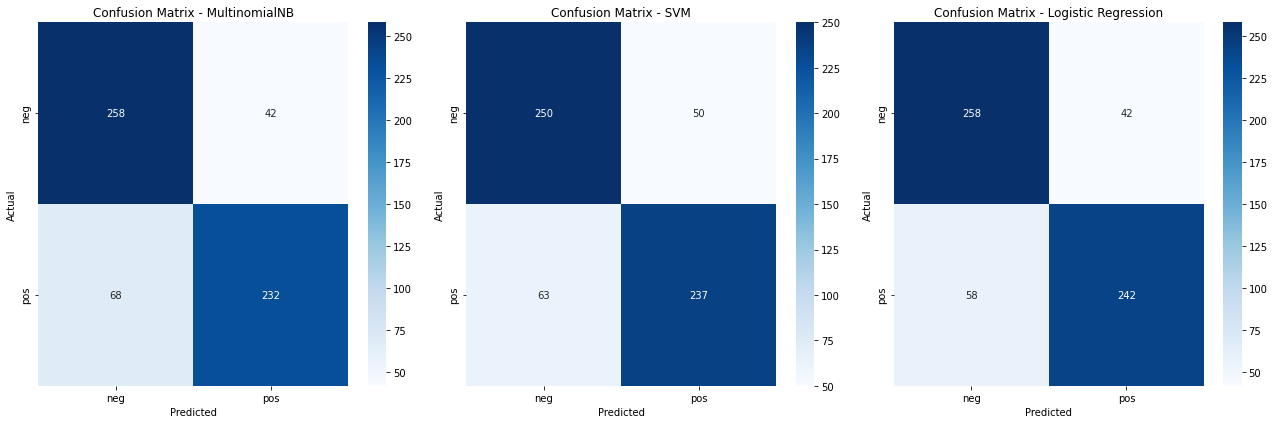

In [14]:
# Modelos definitivos
model_nb = Pipeline([
    ("vectorizer", CountVectorizer(max_df=0.6, min_df=0.01)),
    ("classifier", MultinomialNB(alpha=2.0))
])
model_nb.fit(X_train, y_train)
accuracy_nb = accuracy_score(y_test, model_nb.predict(X_test))
f1_nb = f1_score(y_test, model_nb.predict(X_test), average="weighted")
conf_matrix_nb = confusion_matrix(y_test, model_nb.predict(X_test))

model_svm = Pipeline([
    ("vectorizer", CountVectorizer(max_df=0.7, min_df=0.01)),
    ("classifier", SVC(C=100, gamma="auto", kernel="rbf"))
])
model_svm.fit(X_train, y_train)
accuracy_svm = accuracy_score(y_test, model_svm.predict(X_test))
f1_svm = f1_score(y_test, model_svm.predict(X_test), average="weighted")
conf_matrix_svm = confusion_matrix(y_test, model_svm.predict(X_test))

model_lr = Pipeline([
    ("vectorizer", CountVectorizer(max_df=0.9, min_df=0.01)),
    ("classifier", LogisticRegression(C=0.1, penalty="l2", solver="lbfgs", max_iter=1000))
])
model_lr.fit(X_train, y_train)
accuracy_lr = accuracy_score(y_test, model_lr.predict(X_test))
f1_lr = f1_score(y_test, model_lr.predict(X_test), average="weighted")
conf_matrix_lr = confusion_matrix(y_test, model_lr.predict(X_test))

# Crear un DataFrame para comparar las métricas
results_df = pd.DataFrame({
    'Model': ['MultinomialNB', 'SVM', 'Logistic Regression'],
    'Accuracy': [accuracy_nb, accuracy_svm, accuracy_lr],
    'F1 Score': [f1_nb, f1_svm, f1_lr]
})
print("Comparativa de Resultats:")
print(results_df)

# Graficar las matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
conf_matrices = [conf_matrix_nb, conf_matrix_svm, conf_matrix_lr]
titles = ['Confusion Matrix - MultinomialNB', 'Confusion Matrix - SVM', 'Confusion Matrix - Logistic Regression']

for ax, conf_matrix, title in zip(axes, conf_matrices, titles):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model_nb.classes_, yticklabels=model_nb.classes_, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import classification_report

# Obtener predicciones
y_pred = model_lr.predict(X_test)

# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Identificar las clasificaciones incorrectas con sus textos originales
misclassified_texts = [(documents[test_ids[i]][0], pred, actual) for i, (pred, actual) in enumerate(zip(y_pred, y_test)) if pred != actual]

# Mostrar los textos mal clasificados junto con la predicción y la etiqueta real
print("Textos mal clasificados (Texto, Predicción, Real):")
for words, pred, actual in misclassified_texts[:25]:
    print(f"Texto: {' '.join(words)}\nPredicción: {pred}, Real: {actual}\n")


Reporte de clasificación:
               precision    recall  f1-score   support

         neg       0.82      0.86      0.84       300
         pos       0.85      0.81      0.83       300

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600

Textos mal clasificados (Texto, Predicción, Real):
Texto: moviemaking is a lot like being the general manager of an nfl team in the post - salary cap era -- you ' ve got to know how to allocate your resources . every dollar spent on a free - agent defensive tackle is one less dollar than you can spend on linebackers or safeties or centers . in the nfl , this leads to teams like the detroit lions , who boast a superstar running back with a huge contract , but can only field five guys named herb to block for him . in the movies , you end up with films like " spawn " , with a huge special - effects budget but not enough money to hire any rec

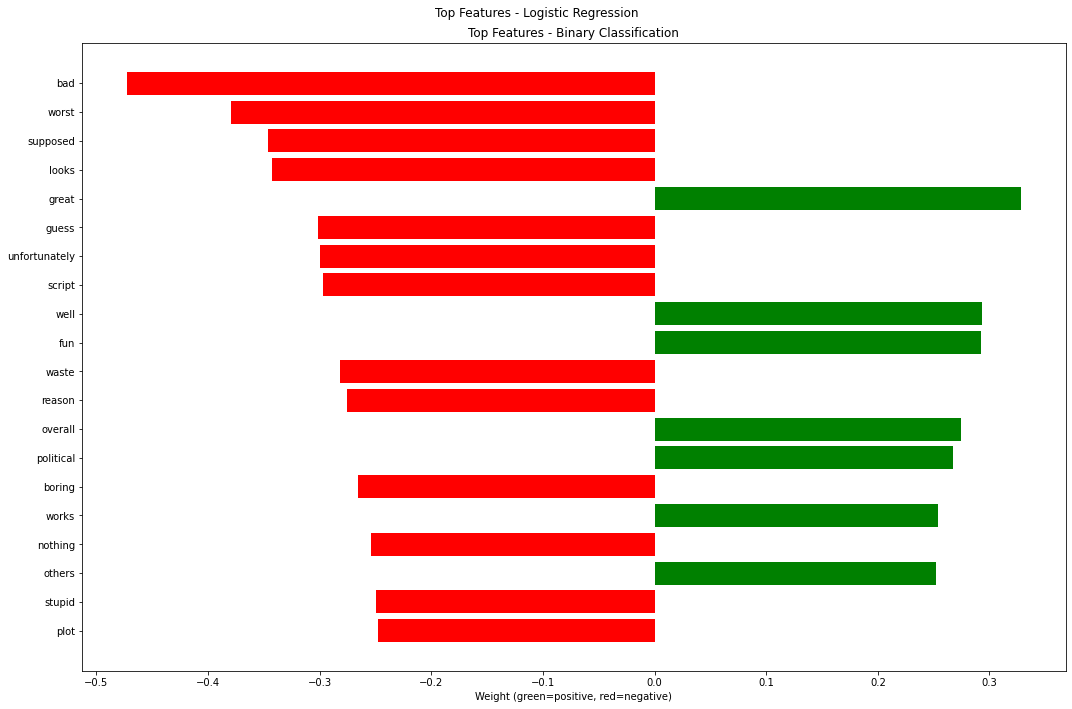

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def get_top_features(model, vectorizer, n_top_features=20):
    classifier = model.named_steps['classifier']
    feature_names = vectorizer.get_feature_names_out()
    feature_weights = classifier.coef_
    
    top_features_per_class = {}
    
    if feature_weights.ndim == 1 or feature_weights.shape[0] == 1:
        weights = feature_weights[0] if feature_weights.ndim > 1 else feature_weights
        top_indices = np.abs(weights).argsort()[::-1][:n_top_features]
        top_features = [(feature_names[idx], weights[idx]) for idx in top_indices]
        class_name = model.classes_[0] if len(model.classes_) == 1 else "Binary Classification"
        top_features_per_class[class_name] = top_features
    else:
        for i, class_name in enumerate(model.classes_):
            top_indices = np.abs(feature_weights[i]).argsort()[::-1][:n_top_features]
            top_features = [(feature_names[idx], feature_weights[i][idx]) for idx in top_indices]
            top_features_per_class[class_name] = top_features
    
    return top_features_per_class

def plot_top_features(features_dict, title):
    plt.figure(figsize=(15, 10))
    num_classes = len(features_dict)
    
    for i, (class_name, features) in enumerate(features_dict.items(), 1):
        plt.subplot(1, num_classes, i)
        features_sorted = sorted(features, key=lambda x: abs(x[1]))
        feature_names = [f[0] for f in features_sorted]
        feature_values = [f[1] for f in features_sorted]
        
        colors = ['green' if val > 0 else 'red' for val in feature_values]
        plt.barh(feature_names, feature_values, color=colors)
        plt.title(f'Top Features - {class_name}')
        plt.xlabel('Weight (green=positive, red=negative)')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

model = model_lr
vectorizer = model.named_steps['vectorizer']
lr_features = get_top_features(model, vectorizer, n_top_features=20)
plot_top_features(lr_features, 'Top Features - Logistic Regression')